# IPL DATA ANALYSYS

In [1]:
# Step 1 Load import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [3]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260919,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [4]:
deliveries.shape

(260920, 17)

In [5]:
deliveries.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [7]:
matches = pd.read_csv("matches.csv")

In [8]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [9]:
matches.tail()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [10]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [11]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [12]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [13]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [14]:
matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

# Handling Missing Values

In [15]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [16]:
matches['city'].mode()[0]

'Mumbai'

In [17]:
print(matches['city'].mode())
print(matches['city'].unique())


0    Mumbai
Name: city, dtype: object
['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah'
 'Navi Mumbai' 'Lucknow' 'Guwahati' 'Mohali']


In [18]:
# city - 55 missing values , city is categorical type of data so we can fill this using fill or mode

matches['city'] = matches['city'].fillna(matches['city'].mode()[0])


In [19]:
matches['player_of_match']=matches['player_of_match'].fillna('Unknown')


In [23]:
matches['result_margin'].unique()

array([140.,  33.,   9.,   5.,   6.,   3.,  66.,   7.,  10.,   4.,  13.,
        45.,   8.,  29.,  18.,  23.,  12.,  65.,  25.,   1.,  14.,  41.,
       105.,  19.,  75.,  92.,  11.,  24.,   0.,  27.,  38.,  78.,  16.,
        53.,   2.,  31.,  55.,  98.,  34.,  36.,  17.,  39.,  40.,  67.,
        63.,  37.,  57.,  35.,  22.,  21.,  48.,  26.,  20.,  85.,  32.,
        76., 111.,  82.,  43.,  58.,  28.,  74.,  42.,  59.,  46.,  47.,
        86.,  44.,  87., 130.,  15.,  60.,  77.,  30.,  50.,  93.,  72.,
        62.,  97., 138.,  71., 144.,  80.,  51.,  61., 146.,  64., 102.,
       118.,  49.,  69.,  88.,  54.,  91.,  52.,  81.,  56., 112., 106.])

In [24]:
matches['result_margin'] = matches['result_margin'].fillna(0)

In [25]:
matches['target_runs'] = matches['target_runs'].fillna(0)

In [26]:
matches['target_overs'] = matches['target_overs'].fillna(0)

In [27]:
matches['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [28]:
matches['winner'] = matches['winner'].fillna("Unknown")

In [29]:
matches.isnull().sum()[matches.isnull().sum() >0]

method    1074
dtype: int64

In [30]:
matches.isnull().sum()/matches.shape[0]*100

id                  0.000000
season              0.000000
city                0.000000
date                0.000000
match_type          0.000000
player_of_match     0.000000
venue               0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
winner              0.000000
result              0.000000
result_margin       0.000000
target_runs         0.000000
target_overs        0.000000
super_over          0.000000
method             98.082192
umpire1             0.000000
umpire2             0.000000
dtype: float64

In [31]:
matches.drop(columns =['method'],inplace=True)

In [32]:
matches.isnull().sum()[matches.isnull().sum() >0]

Series([], dtype: int64)

## Handling Missing Values for Deliveries

In [34]:
deliveries.isnull().sum()[deliveries.isnull().sum()>0]

extras_type         246795
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [36]:
deliveries.isnull().sum()[deliveries.isnull().sum()>0]/deliveries.shape[0]*100

extras_type         94.586463
player_dismissed    95.036793
dismissal_kind      95.036793
fielder             96.414993
dtype: float64

In [39]:
deliveries['extras_type']=deliveries['extras_type'].fillna('None')

In [40]:
deliveries['player_dismissed']=deliveries['player_dismissed'].fillna("None")

In [41]:
deliveries['dismissal_kind'] = deliveries['dismissal_kind'].fillna("None")

In [42]:
deliveries['fielder'] = deliveries['fielder'].fillna("None")

In [43]:
deliveries.isnull().sum()[deliveries.isnull().sum()>0]/deliveries.shape[0]*100

Series([], dtype: float64)

# Data Visualization Part

In [44]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

In [48]:
match_count = matches['season'].value_counts().sort_index()

In [66]:
matches['season'].value_counts()

season
2013       76
2023       74
2012       74
2022       74
2011       73
2024       71
2018       60
2021       60
2020/21    60
2019       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64

In [59]:
match_count.index, match_count.values

(Index(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014', '2015',
        '2016', '2017', '2018', '2019', '2020/21', '2021', '2022', '2023',
        '2024'],
       dtype='object', name='season'),
 array([58, 57, 60, 73, 74, 76, 60, 59, 60, 59, 60, 60, 60, 60, 74, 74, 71],
       dtype=int64))

In [49]:
match_count

season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64

# 1.Plot number of matches per season

In [86]:
import pandas as pd

# Count matches per season
season_counts = matches['season'].value_counts().sort_index()
season_df = season_counts.reset_index()
season_df.columns = ['season', 'match_count']


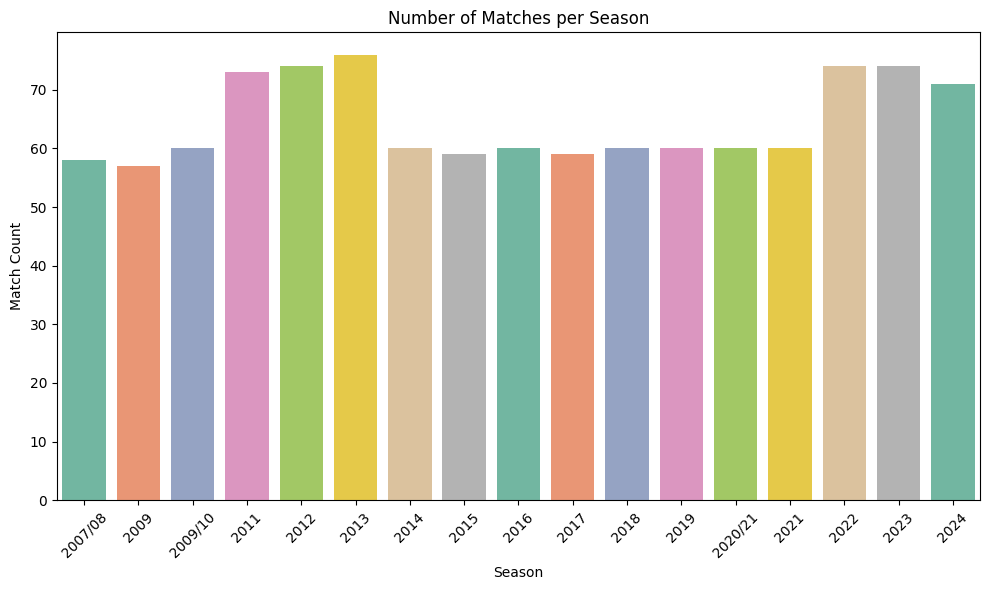

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(data=season_df, x='season', y='match_count', hue='season', palette='Set2', legend=False)

plt.title("Number of Matches per Season")
plt.xlabel("Season")
plt.ylabel("Match Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 2: Most Successful Teams (By Number of Wins)

C:\Users\vaishali\AppData\Local\Temp\ipykernel_1404\1235732257.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams, x='wins', y='team', palette='Blues_r')


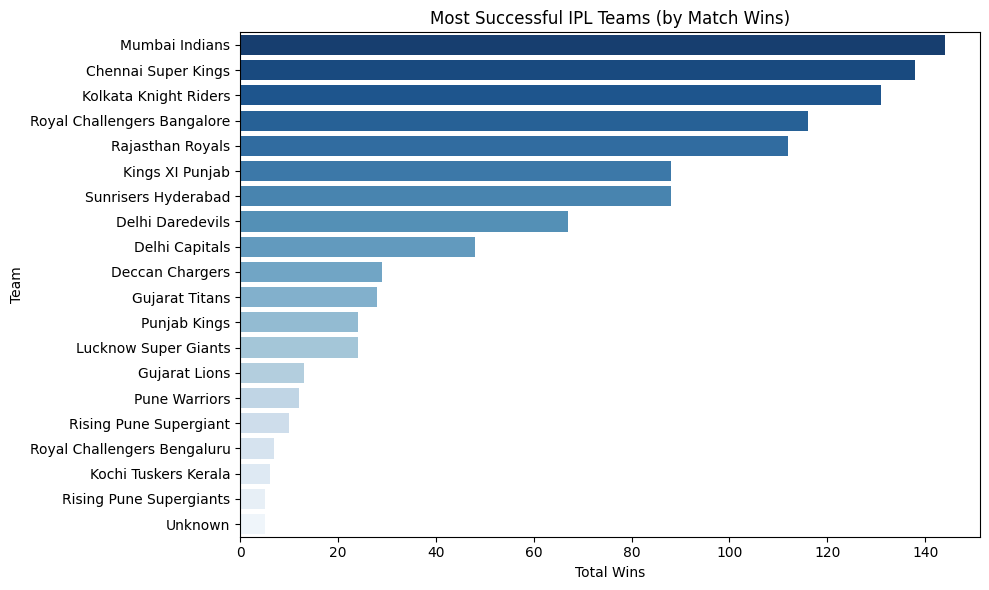

In [88]:
# Count total wins by each team
top_teams = matches['winner'].value_counts().reset_index()
top_teams.columns = ['team', 'wins']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_teams, x='wins', y='team', palette='Blues_r')

plt.title("Most Successful IPL Teams (by Match Wins)")
plt.xlabel("Total Wins")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


# Step 3: Toss Winner vs Match Winner

In [89]:
# Total number of matches
total_matches = matches.shape[0]

# Matches where toss winner is also the match winner
same_winner = matches[matches['toss_winner'] == matches['winner']].shape[0]

# Calculate percentage
percentage = (same_winner / total_matches) * 100

# Print the result
print(f"Toss winner also won the match in {percentage:.2f}% of the matches.")


Toss winner also won the match in 50.59% of the matches.


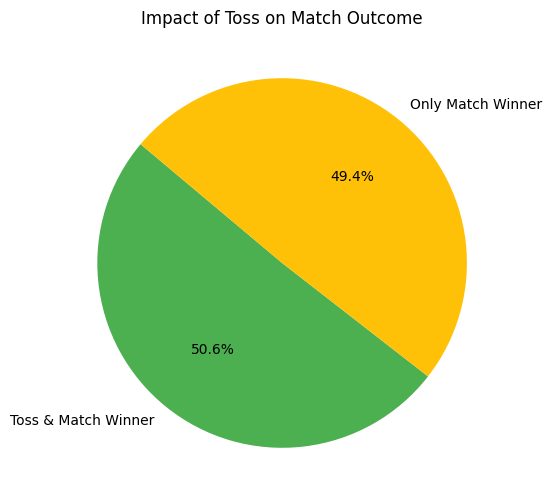

In [90]:
plt.figure(figsize=(6, 6))
labels = ['Toss & Match Winner', 'Only Match Winner']
values = [same_winner, total_matches - same_winner]
colors = ['#4CAF50', '#FFC107']

plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Impact of Toss on Match Outcome')
plt.show()


C:\Users\vaishali\AppData\Local\Temp\ipykernel_1404\355808160.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_players, x='awards', y='player', palette='viridis')


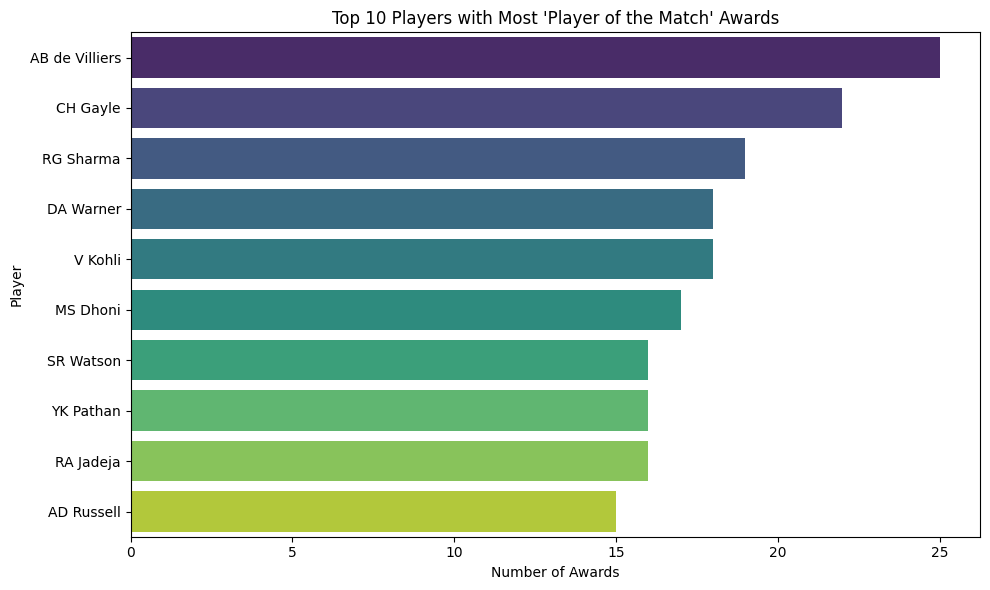

In [91]:
# Count top 10 players with most 'Player of the Match' awards
top_players = matches['player_of_match'].value_counts().head(10).reset_index()
top_players.columns = ['player', 'awards']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_players, x='awards', y='player', palette='viridis')

plt.title("Top 10 Players with Most 'Player of the Match' Awards")
plt.xlabel("Number of Awards")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


# Step 6: Deliveries-Level Analysis – Top Run Scorers

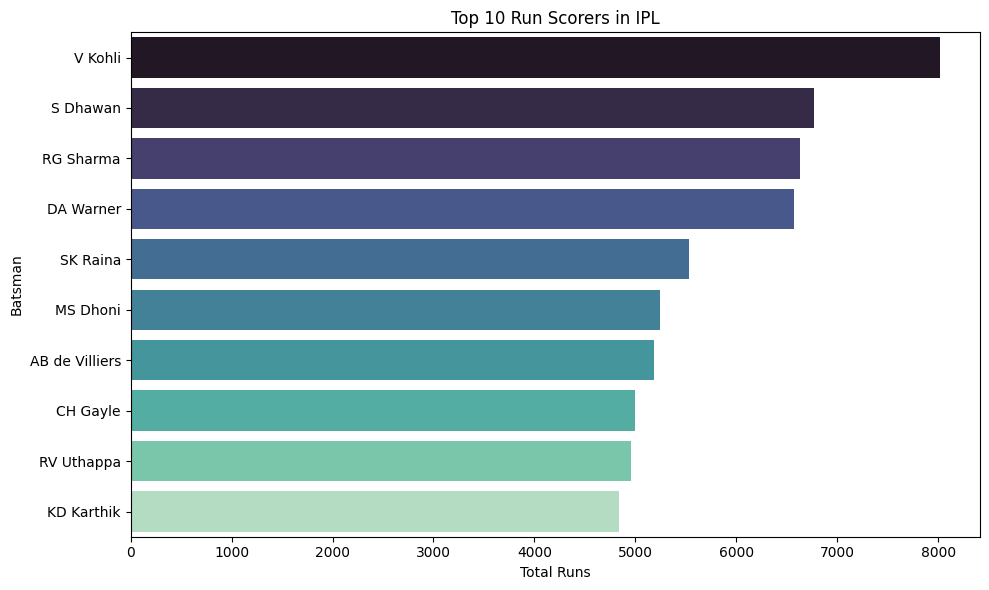

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_batsmen,
    x='total_runs',
    y='batsman',
    hue='batsman',        # assigns color by each batsman
    palette='mako',
    legend=False          # no need for a duplicate legend
)

plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


In [93]:
print(deliveries.columns)


Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


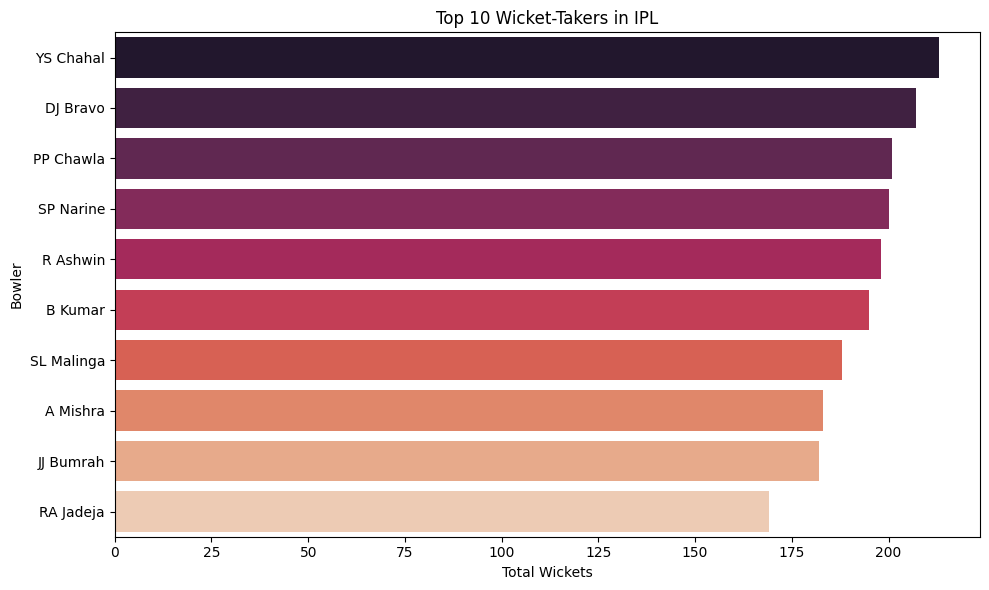

In [97]:
# Filter out only rows where a player was dismissed
# Top Bowlers Chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_bowlers,
    x='wickets',
    y='bowler',
    hue='bowler',         # Add hue to match color with each bowler
    palette='rocket',
    legend=False          # Hide extra legend
)

plt.title("Top 10 Wicket-Takers in IPL")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()


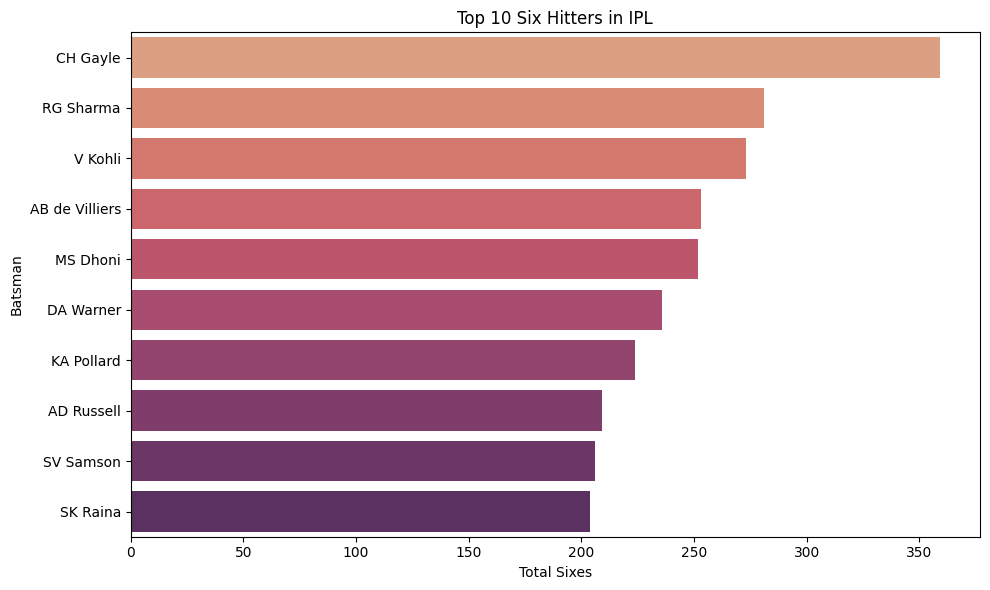

In [98]:
# Filter only those deliveries where the batsman hit a six
sixes = deliveries[deliveries['batsman_runs'] == 6]

# Count number of sixes hit by each batter
top_six_hitters = sixes['batter'].value_counts().head(10).reset_index()
top_six_hitters.columns = ['batsman', 'sixes']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_six_hitters,
    x='sixes',
    y='batsman',
    hue='batsman',
    palette='flare',
    legend=False
)

plt.title("Top 10 Six Hitters in IPL")
plt.xlabel("Total Sixes")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


# Top Strike Rate (Minimum 200 Balls Faced)

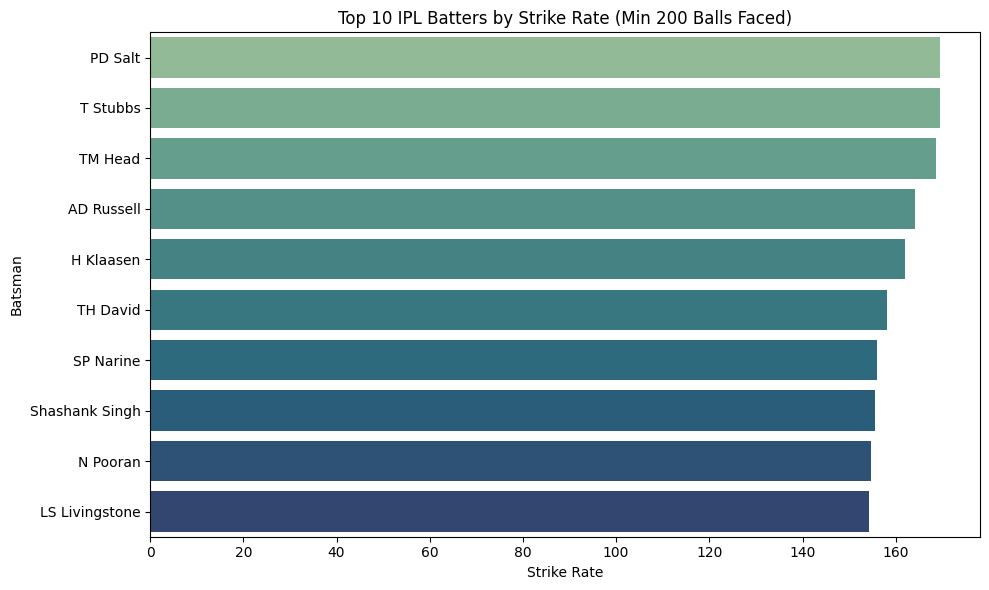

In [99]:
# Count total runs and balls faced by each batter
batter_stats = deliveries.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('batter', 'count')
).reset_index()

# Calculate strike rate
batter_stats['strike_rate'] = (batter_stats['total_runs'] / batter_stats['balls_faced']) * 100

# Filter players with minimum 200 balls faced
filtered_stats = batter_stats[batter_stats['balls_faced'] >= 200]

# Get top 10 by strike rate
top_strikers = filtered_stats.sort_values(by='strike_rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_strikers,
    x='strike_rate',
    y='batter',
    hue='batter',
    palette='crest',
    legend=False
)

plt.title("Top 10 IPL Batters by Strike Rate (Min 200 Balls Faced)")
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


# Over-wise Run Analysis

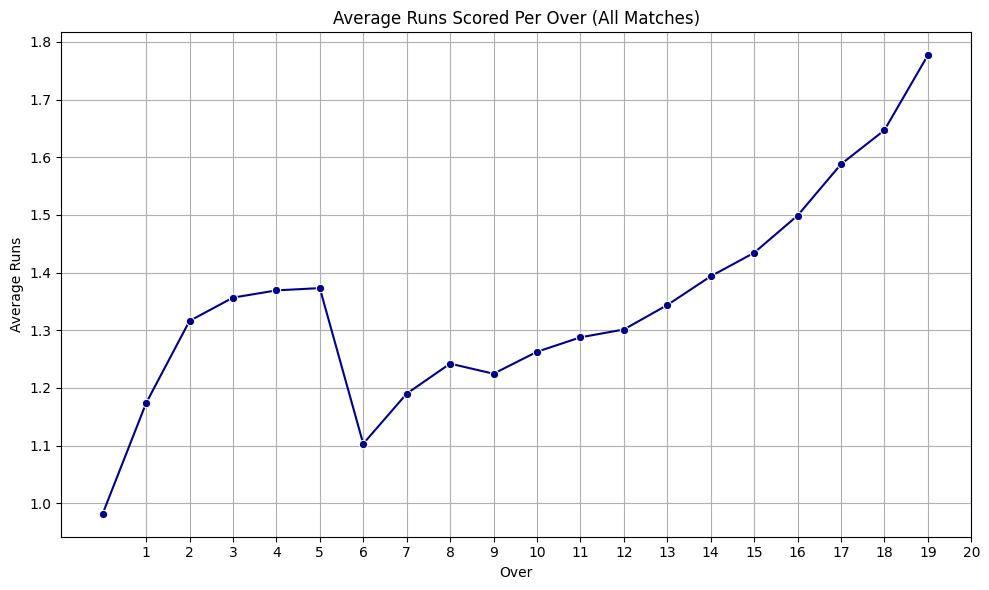

In [100]:
# Group by 'over' and calculate total runs scored in that over (across all matches)
over_runs = deliveries.groupby('over')['total_runs'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=over_runs, x='over', y='total_runs', marker='o', color='darkblue')

plt.title("Average Runs Scored Per Over (All Matches)")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.xticks(range(1, 21))  # IPL has max 20 overs per innings
plt.grid(True)
plt.tight_layout()
plt.show()


# Team-wise Total Runs Scored

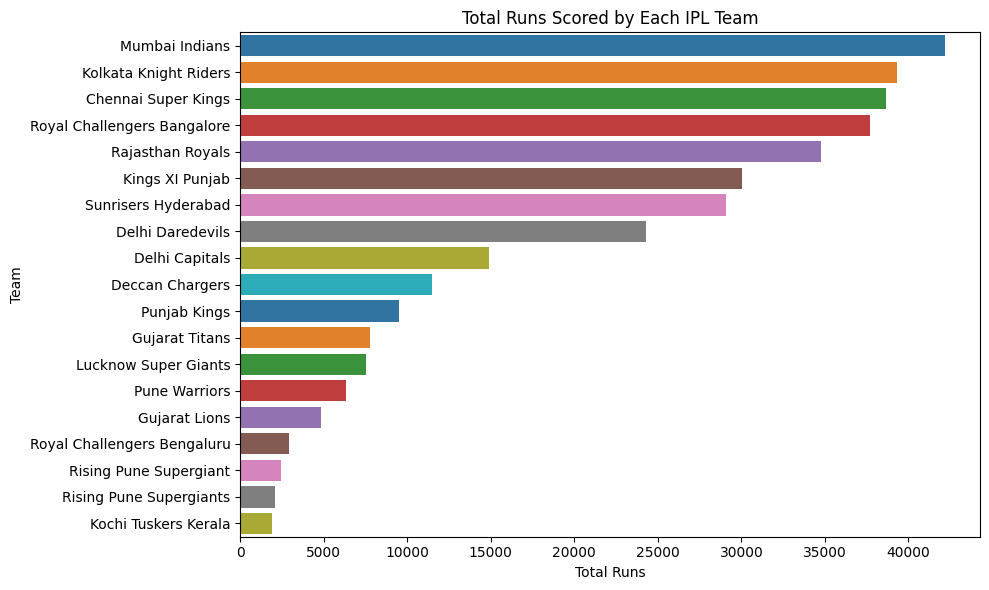

In [101]:
# Group by batting team and sum total runs
team_runs = deliveries.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).reset_index()
team_runs.columns = ['team', 'total_runs']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=team_runs,
    x='total_runs',
    y='team',
    hue='team',
    palette='tab10',
    legend=False
)

plt.title("Total Runs Scored by Each IPL Team")
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.tight_layout()
plt.show()
